We will use the library function to load tidyverse, tidymodels, repr, and readxl package into R. 

In [10]:
library(repr)
library(readxl)
library(tidyverse)
library(tidymodels)
set.seed(1)

# Introduction
For our Data Science 100 group project, we will be using a dataset looking at the knowledge status of students about Electrical DC Machines. The knowledge of the students were classified by the authors through utilization of a “hybrid ML technique of k-NN and meta-heuristic exploring methods” knowledge classifier, k-nearest neighbor algorithm. Various attributes and predictors were taken into account when making their dataset, looking at study time, repetition, and exam performance. The knowledge classifier measures the distance between students depending on their data and the value of their knowledge weights. The dissimilarities go into determining their knowledge class.

# Question
How strongly is knowledge level associated with study time, repetition, and exam performance?


# The Dataset
The dataset we use is downloaded from this link (https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls), and it’s in sheet 2 ("Training Data"). 

Since it is an untidy data, we can use “select” function to delete the description, and the remaining data will be a tidy data. 


# Preliminary exploratory data analysis:

In [4]:
#STG (The degree of study time for goal object materails)
#SCG (The degree of repetition number of user for goal object materails)
#STR (The degree of study time of user for related objects with goal object)
#LPR (The exam performance of user for related objects with goal object)
#PEG (The exam performance of user for goal objects)
#UNS (The knowledge level of user)

# Demonstrate that the dataset can be read from the web into R 
user_knowledge <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2)

# Clean and wrangle your data into a tidy format
user_knowledge_wrangle <- user_knowledge |>
    select(STG:UNS)

# Using only training data, summarize the data in at least one table (this is exploratory data analysis). 
user_knowledge_training <- user_knowledge_wrangle |>
    select(STG:UNS) |>
    mutate(UNS = as_factor(UNS))
user_knowledge_training

user_knowledge_testing <- user_knowledge_wrangle |>
    select(STG:UNS) |>
    mutate(UNS = as_factor(UNS))
user_knowledge_testing

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


In [3]:
user_summary <- user_knowledge_training |>
    group_by(UNS)|>
    summarize (mean_of_STG = mean(STG),
               mean_of_SCG = mean(SCG),
               mean_of_LPR = mean(LPR),
               number_of_UNS = n())
user_summary

UNS,mean_of_STG,mean_of_SCG,mean_of_LPR,number_of_UNS
<fct>,<dbl>,<dbl>,<dbl>,<int>
very_low,0.3057917,0.1981250,0.3587500,24
High,0.4216508,0.4231905,0.5012698,63
Low,0.3211446,0.3370000,0.4973494,83
Middle,0.3999773,0.3679205,0.3428409,88


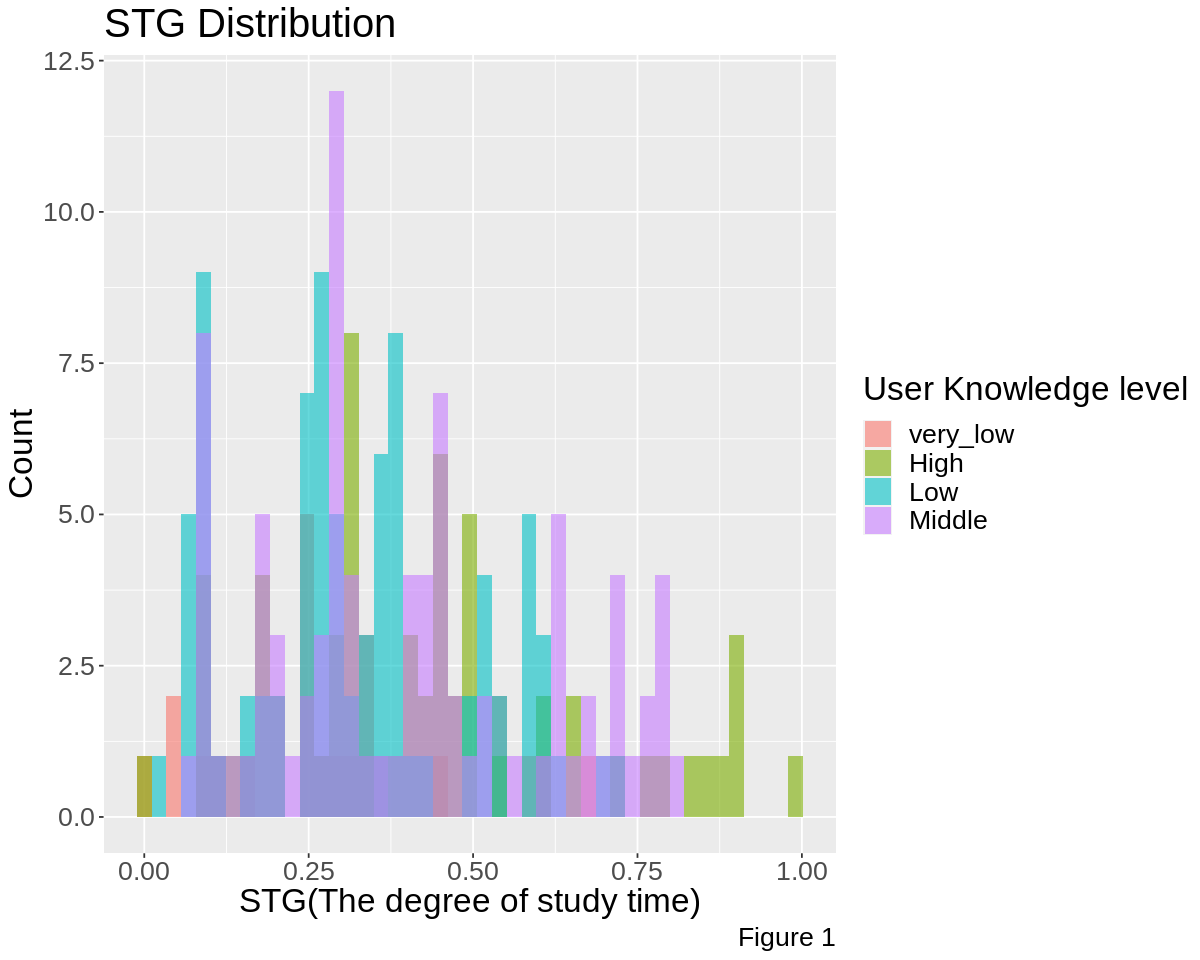

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)
STG_vs_UNS_hist <- user_knowledge_training|>
    ggplot(aes(x=STG, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity")+
    labs(x="STG(The degree of study time)", y="Count", title = "STG Distribution", caption="Figure 1", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))
STG_vs_UNS_hist

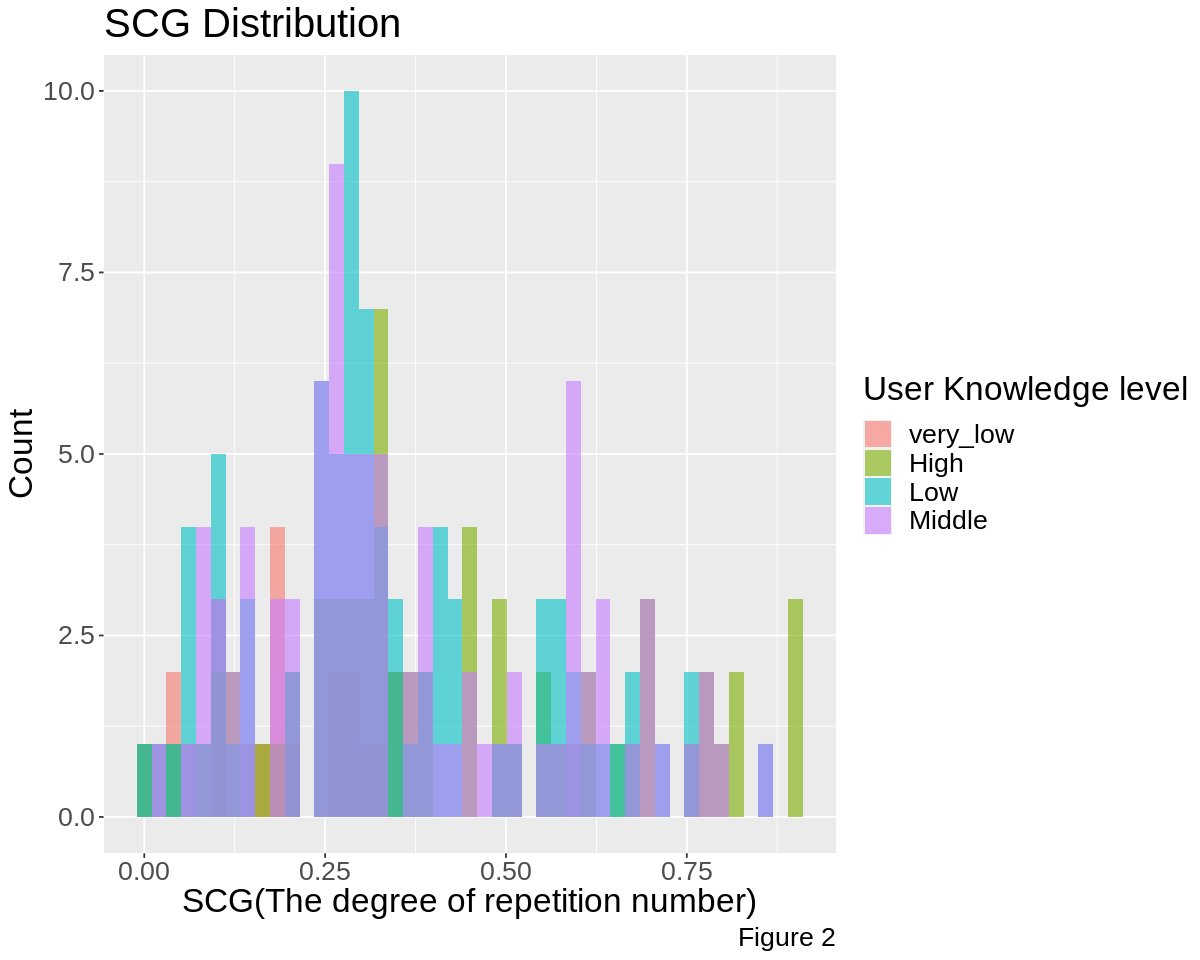

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
SCG_hist <- user_knowledge_training|>
    ggplot(aes(x=SCG, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity")+
    labs(x="SCG(The degree of repetition number)", y="Count", title = "SCG Distribution", caption="Figure 2", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))
SCG_hist

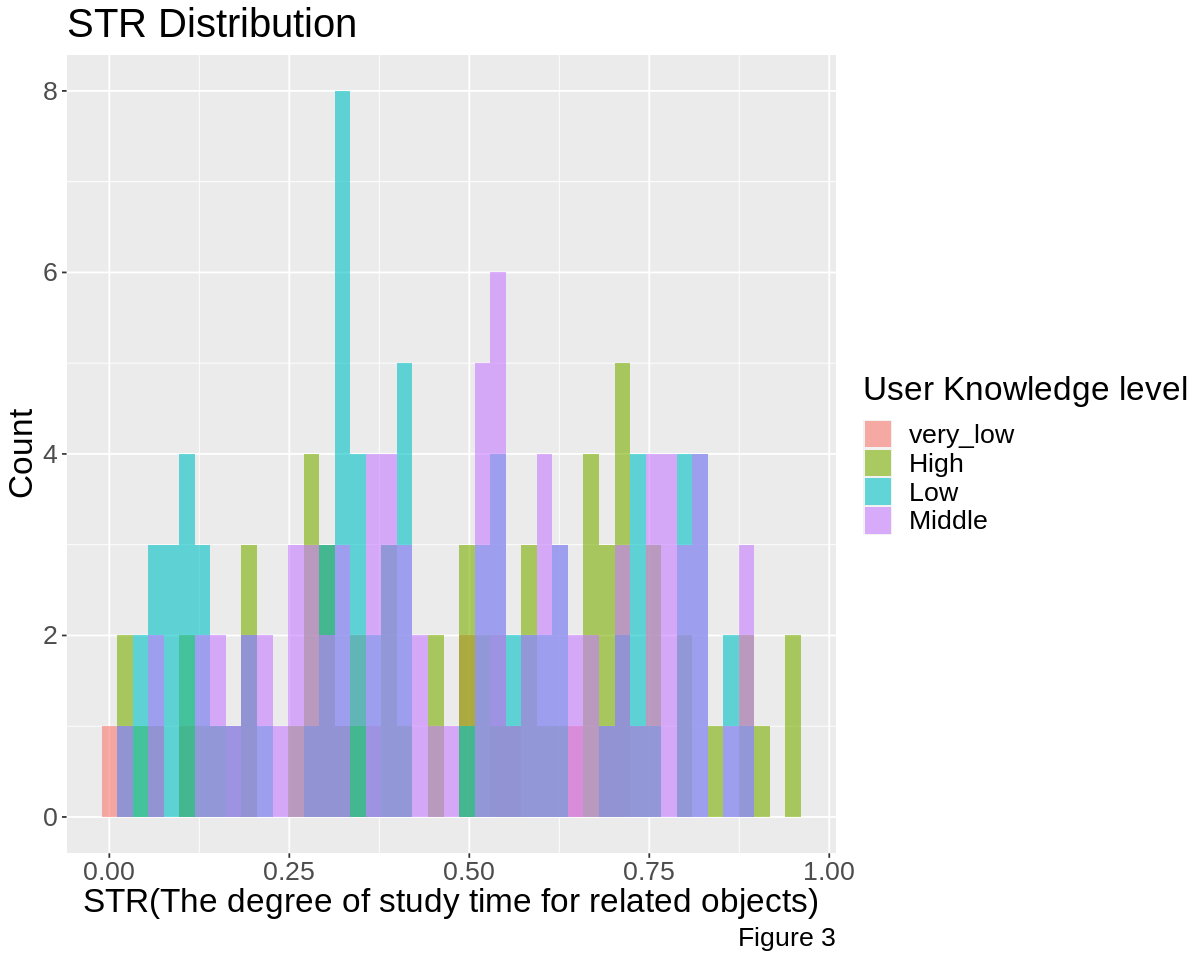

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
STR_hist <- user_knowledge_training|>
    ggplot(aes(x=STR, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity")+
    labs(x="STR(The degree of study time for related objects)", y="Count", title = "STR Distribution", caption="Figure 3", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))
STR_hist

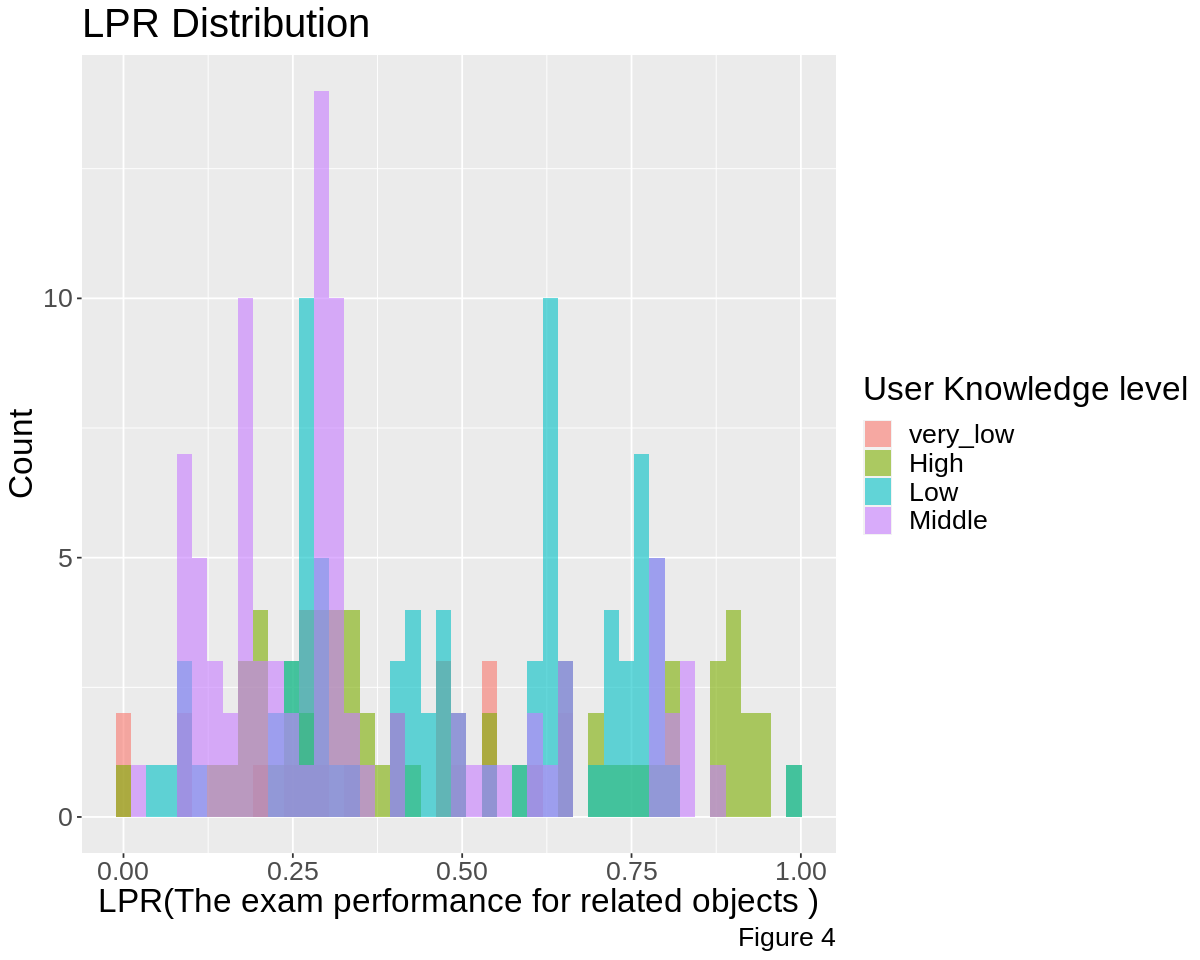

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)
LPR_hist <- user_knowledge_training|>
    ggplot(aes(x=LPR, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity")+
    labs(x="LPR(The exam performance for related objects )", y="Count", title = "LPR Distribution", caption="Figure 4", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))
LPR_hist

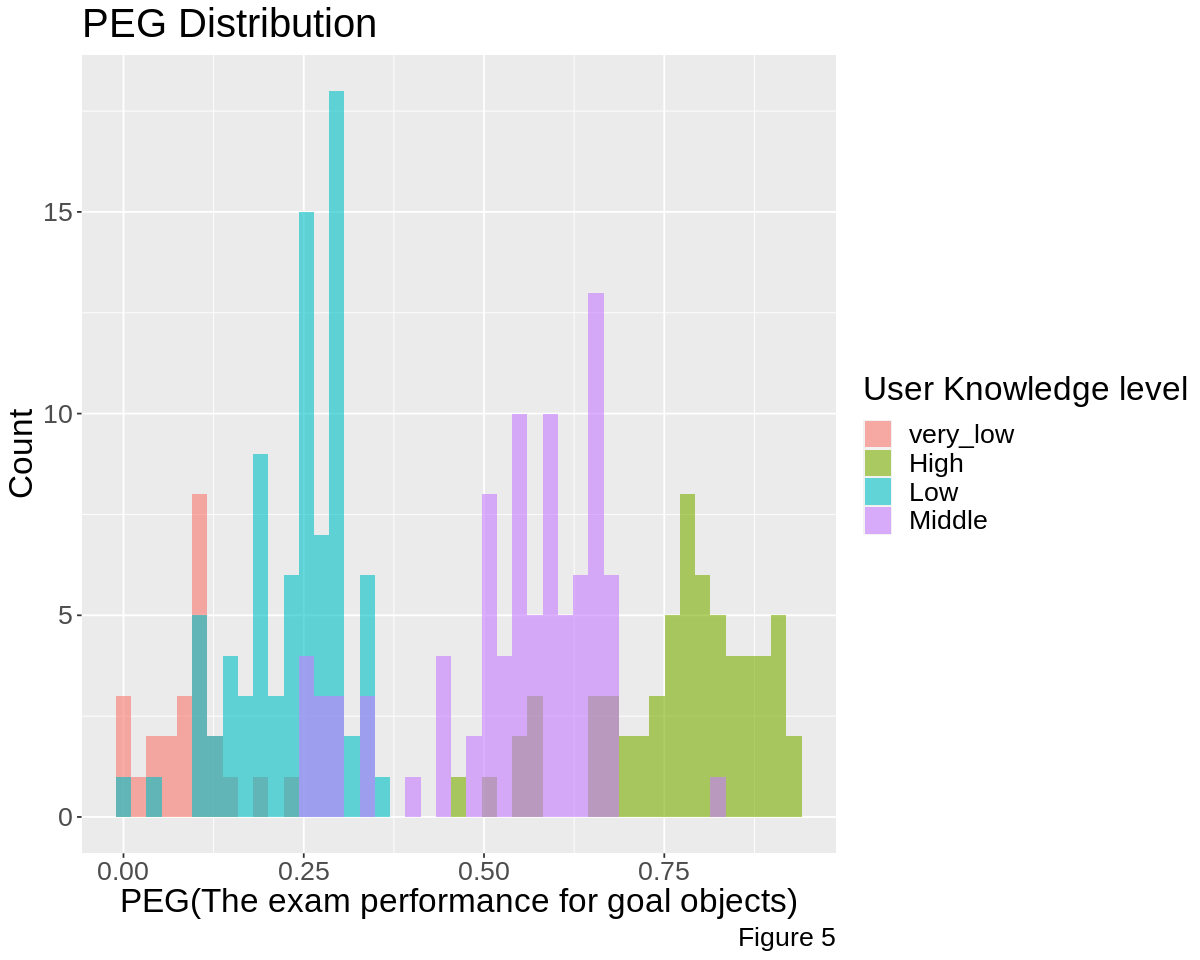

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8)
PEG_hist <- user_knowledge_training|>
    ggplot(aes(x=PEG, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity")+
    labs(x="PEG(The exam performance for goal objects)", y="Count", title = "PEG Distribution", caption="Figure 5", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))
PEG_hist

# Methods
After visualizing the histogram of each variable which is colored by UNS(The knowledge level of the users). We choose the following variables, we can create a KNN classification model to predict user knowledge level.
- UNS (The knowledge level of user)
- PEG (The exam performance of user for goal objects)

The KNN classification model will need to be trained, evaluated, and tuned with training and testing sets before predicting the knowledge level of users. Comparing the histogram of each variable, Figure 5(PEG Distribution) has less overlap with each knowledge level, which means that PEG has a stronger relevance with UNS compared to other variables. Therefore, the PEG variable will be the useful predictor we are using to do a more effective model.


# Expected Outcomes and significance
### Expect to find
- Given the user knowledge data, we have the expectation of determining the most effective predictor in the students’ knowledge on Electrical DC Machines when tested.
### Impact of findings
- The impact of our findings is that we determine the predictor that best correlates with students’ knowledge. We can use this information to apply to areas of study other than solely Electrical DC Machines 
### Future questions
- Future questions could look at different predictors and their effect on user knowledge when examined on Electrical DC Machines. Different predictors include those not within this particular data set. For example, how room temperature when conducting the same study methods effects user knowledge.
